## 02. 데이터의 정제

### Import

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, sklearn, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
matplotlib 3.5.3
seaborn 0.12.2


### 예제 데이터셋 준비

In [2]:
df_space = pd.read_csv('data/space_titanic.csv', index_col='PassengerId')
df_space.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_berry = pd.read_csv('data/wild_blueberry.csv', index_col='Row#')
df_berry.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 1. 데이터 정제
- 데이터의 오류를 바로 잡아 보다 정합성을 높이는 과정
- 모델의 성능 향상
- 업무 신뢰성 확보
- 데이터 품질 향상

| 주요 작업 | 설명 |
| --- | --- |
| 결측치 처리 | 누락된 값을 제가, 대체, 보간 등으로 채움 |
| 이상치 처리 | 적정상 범위를 벗어난 비정상적인 값을 찾아 조정 |
| 데이터 정리 | 데이터 정형화, 중복 제거, 비일관성 제거, 변수 형식 통일, 오탈자 수정, 무의미한 값 정리, … |


### 2. 결측의 유형

| 종류 | 설명 | 편향성 |
| --- | --- | --- |
| 완전 무작위 결측(MCAR)<br/>Missing Completely At Random | 결측이 데이터의 다른 변수와 아무런 관련이 없음 | 없음 |
| (조건부) 무작위 결측(MAR)<br/>Missing(conditionally) At Random | 결측에 해당하는 변수와는 상관이 없고, 다른 변수와 상관이 있음 | 있음 |
| 비무작위 결측(MNAR)<br/>Missing Not At Random | 결측이 결측값 그 자체와 관련있거나 다른 미관측값과 관련이 있음 | 강함 |


### 3. 결측치 처리

- 결측이 발생한 원인 과 데이터의 성향을 고려
- 결측치 처리의 핵심


| 종류 | 설명 | 장점 | 단점 |
| --- | --- | --- | --- |
| 제거 / 완전 분석<br/>(Remove, Completes Analysis) | 불완전한 자료는 완전하게 제외 | 빠르고 간단 | 데이터 손실 |
| 결측 여부 보존<br/>(Indication) | 결측 여부를 특정 값으로 대체<br/>결측 여부를 나타내는 변수 생성 | 빠르고 간단 | 변수의 증가,<br/>해석이 어려워 짐 |
| 단순 대치<br/>(Simple Imputation) | 평균, 중앙값, 최빈값 등 통계치로 대체 | 쉽고, 빠름 | 통계 왜곡 |
| 회귀 대치<br/>(Regression Imputation) | 회귀 모델과 같은 예측 모델을 만들어 대체<br/>조건부 평균 대치라고도 함 | 정확도가 높아짐 | 계산 복잡도가<br/>높아짐 |
| 다중 대치<br/>(Multiple Imputation) | 여러 개의 대치 결과를 만들고 종합하여 적용 | 통계적 타당성 증가 | 계산 복잡도가<br/>높아짐 |


**[Ex.1]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_space에서 결측이 있는 레코드는 완전 제거합니다.

</div>

In [5]:
# 결측의 수 확인
df_space.isna().sum().to_frame().T

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,201,217,199,182,179,203,181,183,208,183,188,200,0


In [6]:
# 결측이 있으면 제거합니다.
df_space_dropna = df_space.dropna() 
df_space_dropna.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
# 결측을 삭제후 결과를 확인합니다.
df_space_dropna.isna().sum().to_frame().T

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0,0,0,0,0,0,0,0,0,0,0,0


**[Ex.2]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_space에서 Name의 결측치는 모두 Unknown으로 단순 대치 합니다.

</div>

In [8]:
df_space['Name'] = df_space['Name'].fillna('Unknown')

#### 회귀 대치

| id | study_hours | attendance | math_score |
| --- | --- | --- | --- |
| A | 10 | 90 | 85 |
| B | 7 | 80 | 78 |
| C | 4 | 60 | ? |
| D | 9 | 85 | 82 |
| E | 6 | 75 | 76 |

**\[Step 1\]회귀 모델 학습**

| id | study_hours | attendance | math_score |
| --- | --- | --- | --- |
| A | 10 | 90 | 85 |
| B | 7 | 80 | 78 |
| D | 9 | 85 | 82 |
| E | 6 | 75 | 76 |

$$
m𝑎𝑡h\_𝑠𝑐𝑜𝑟𝑒=3.5×study\_hours + 0.2×attendance + 10
$$

**\[Step 2\]결측치 예측**

| id | study_hours | attendance | math_score |
| --- | --- | --- | --- |
| A | 10 | 90 | 85 |
| B | 7 | 80 | 78 |
| C | 4 | 60 | <font color='red'>36</font> |
| D | 9 | 85 | 82 |
| E | 6 | 75 | 76 |




**[Ex.2]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

다음 방법에 따라 df_space의 결측을 처리하세요.

df_space Age는 df_space_dropna의  RoomService, FoodCourt, ShoppingMall, Spa, VRDeck의 XGB 회귀모델로 대치합니다.

df_space RoomService, FoodCourt, ShoppingMall, Spa, VRDeck의 결측은 df_space_dropna의 평균으로 대치하여 예측합니다.

In [9]:
import xgboost as xgb
reg_xgb = xgb.XGBRegressor()
X = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
reg_xgb.fit(df_space_dropna[X], df_space_dropna['Age'])
is_age_na = df_space['Age'].isna()
df_space.loc[is_age_na, 'Age'] = reg_xgb.predict(
    df_space.loc[is_age_na, X].fillna(df_space_dropna[X].mean())
)

In [10]:
df_space['Age'].isna().sum()

0

#### 유사도 기반 대치(Hot deck Imputation)
- 데이터 내에서 결측인 관측치와 유사한 관측치를 기반으로 채움

| 종류 | 설명 |
| --- | --- |
| 무작위 유사 대치<br/>(Random Hot deck) | 유사한 관측치들 중에서 임의로 하나 선택 |
| 단순 유사 대치<br/>(Simple Hot deck) | 유사한 관측치들의 평균, 중앙값, 최빈값 등의 통계값으로 대체 |
| 순서 기반 유사 대치<br/>(Sequential Hot deck) | 순서상 가장 가까운 관측치를 기반으로 대치<br/>Ex) 선형 보간 |
| 근접 이웃 기반<br/>(Nearest neighbor) | 거리에 의한 k 개의 이웃 점을 기반으로 대치 |


**[Ex.3]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_space에서 RoomService, FoodCourt, ShoppingMall, Spa, VRDeck은 df_space_dropna의 HomePlanet의 평균으로 대치 합니다.

HomePlanet이 결측일 경우 전체 평균으로 대치합니다.

</div>

In [11]:
X_mean = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_mean = df_space_dropna.groupby('HomePlanet')[X_mean].mean()

df_space.loc[df_space['HomePlanet'].notna(), X_mean] = df_space.groupby('HomePlanet')[X_mean].apply(
    lambda x: x.fillna(df_mean.loc[x.name])
).reset_index(level=0, drop=True)

df_space[X_mean] = df_space[X_mean].fillna(df_space_dropna[X_mean].mean())

#### 선형 보간(Linear Interpolation)

- 변수의 순서와 값에 선형적 관계가 있을 경우 사용

$$
\frac{𝑦−𝑦_0}{𝑥−𝑥_0}=\frac{𝑦_1−𝑦_0}{𝑥_1−𝑥_0}
$$

$$
𝑦=𝑦_0+(𝑥−𝑥_0)\frac{𝑦_1−𝑦_0}{𝑥_1−𝑥_0}
$$



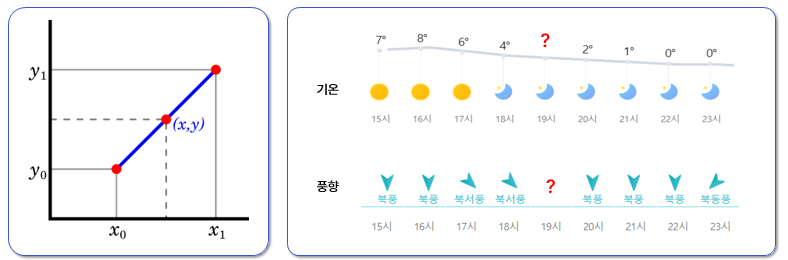

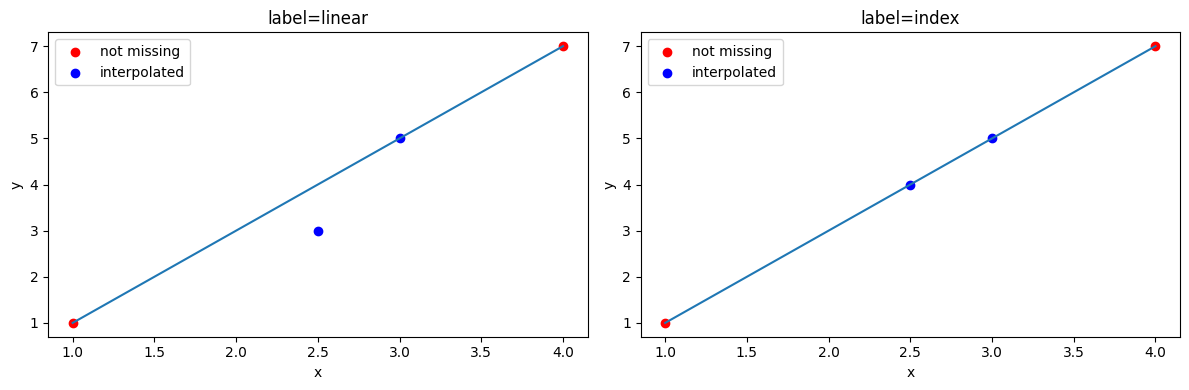

In [12]:
# 샘플 데이터를 만듭니다.
s = pd.Series([1, np.nan, np.nan, 7], index=[1, 2.5, 3, 4])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 결측이 아닌 두점을 잇는 선을 그립니다.
# linear: x 값은 고려하지 않고, 등간격이라는 가정하에 선형 보간을 합니다.
# index: index의 값이 x값이라고 가정하고 선형 보간을 합니다.
for i, ax in zip(['linear', 'index'], axes):
    ax.plot(s.loc[s.notna()])

    # 결측이 아닌 값을 찍습니다.
    s.loc[s.notna()].pipe(
        lambda x: ax.scatter(x=x.index, y=x.values, color='red', label='not missing')
    )
    # 결측인 값을 보간한 값을 찍습니다.
    s.interpolate(method=i).loc[s.isna()].pipe(
        lambda x: ax.scatter(x=x.index, y=x.values, color='blue', label='interpolated')
    )

    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("label=" + i)
plt.tight_layout()
plt.show()

### 4. 이상치

#### 원인

| 원인 |   | 설명 |
| --- | --- | --- |
| 비자연적 이상치<br/>(Non-Natural Outlier) | 입력실수 | 입력의 실수에 의해 |
|   | 측정 오류 | 측정 과정에서의 문제에 의해 |
|   | 실험 오류 | 실험 환경의 문제에 의해 |
|   | 의도적 이상치 | 의도에 의해 자료의 왜곡 |
|   | 데이터 처리 오류 | 데이터 처리 과정에서의 오류 |
|   | 표본 오류 | 표본 추출 과정에서 편향이 발생에 의해 |
| 자연적 이상치<br/>(Natural Outlier) |   | 자연적 현상에 의한 이상치 |


### 5. 이상치 탐지

#### 통계 기반

- 사분위 범위(IQR)
$$
𝐼𝑄𝑅=𝑄3−𝑄1
$$

$$
𝑄1−1.5×𝐼𝑄𝑅<𝑋< 𝑄3+1.5×𝐼𝑄𝑅
$$

- Z-score
$$
𝑍=\frac{𝑋−μ}{𝜎}
$$

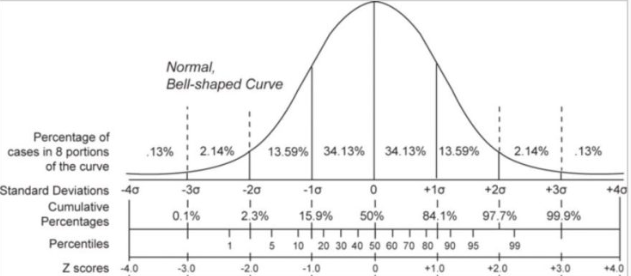

**[Ex.4]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_berry 셋의 fruitset, fruitmass, seeds 가

각 변수별로 $Q_1$, $Q_3$, $IQR$을 구하여, 이상치 여부를 판별합니다.

> $Q_1 - 1.5×IQR ≤X≤ Q_3 + 1.5×IQR$

이중에 하나라도 이상치라면 제거하여 df_berry2셋을 만듭니다.
    
</div>

In [13]:
df_iqr = df_berry[['fruitset', 'fruitmass', 'seeds']].apply(
    lambda x: x.quantile([0.25, 0.75]).rename({0.25:'Q1', 0.75: 'Q3'}) # 각 변수의 1사분위와 3사분위를 구합니다.
).T.assign(
    IQR = lambda x: x['Q3'] - x['Q1'] # IQR을 구합니다.
).assign(
    LB = lambda x: x['Q1'] - 1.5 * x['IQR'], # 하한선을 계산합니다.
    UB = lambda x: x['Q3'] + 1.5 * x['IQR'] # 상한선을 계산합니다.
)
df_iqr

,Q1,Q3,IQR,LB,UB
fruitset,0.454725,0.561297,0.106571,0.294868,0.721153
fruitmass,0.416281,0.476149,0.059869,0.326478,0.565952
seeds,33.116091,39.239668,6.123577,23.930726,48.425033


In [14]:
# 각변수가 하한선 또는 상한선에서 벗어났는지 확인합니다.
df_is_outlier = df_berry[['fruitset', 'fruitmass', 'seeds']].apply(
    lambda x: (x < df_iqr.loc[x.name, 'LB']) | (x > df_iqr.loc[x.name, 'UB'])
)
df_is_outlier

,fruitset,fruitmass,seeds
Row#,,,
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
772,False,False,False
773,False,False,False
774,False,False,False


In [15]:
# 이상치가 하나라도 있는 행을 뽑아 봅니다.

df_berry.loc[df_is_outlier.any(axis=1), ['fruitset', 'fruitmass', 'seeds']]

,fruitset,fruitmass,seeds
Row#,,,
6,0.284443,0.352186,26.101179
7,0.246568,0.342826,25.042361
16,0.288159,0.359459,26.487322
17,0.279536,0.354415,26.282356
18,0.233554,0.335339,24.320627
32,0.262140,0.349354,25.433530
47,0.283055,0.355876,26.054692
766,0.192732,0.311921,22.079199
768,0.249335,0.320727,23.412776


In [16]:
# 이상치에 해당하는 인덱스로, 이상치를 제거한 DataFrame을 df_berry2로 지정합니다.

df_berry2 = df_berry.drop(index=df_berry.loc[df_is_outlier.any(axis=1)].index)

#### 시각화 기반
- 박스 플롯
- 산포도 그래프


#### 모델 기반
- LOF(Local Outlier Factor)
- Isolation Forest

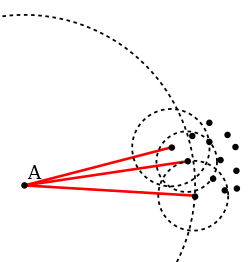
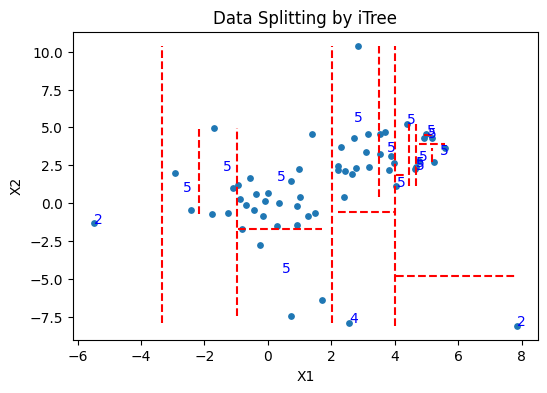


### 5. 이상치 탐지
- 모델 기반

|   | 이상치 탐지<br/>Outlier Detection | 신규성 탐지<br/>Novelty Detection |
| --- | --- | --- |
| 정의 | 주어진 데이터 내에서 비정상적이거나 예외적인 데이터를 탐지 | 새로운 데이터 에서 신규 패턴을 탐지 |
| 데이터의 구성 | 탐색 대상 데이터 | 정상 데이터 |
| 주요 목적 | 이상치 제거, 품질 관리, 노이즈 처리 | 이상 이벤트 탐지, 침입 감지, 새로운 패턴 경보 |


#### Local Outlier Factor(LOF)
- 데이터 포인트의 지역 밀도(local density)를 기반의 이상치 점수 기준으로 이상치 판별

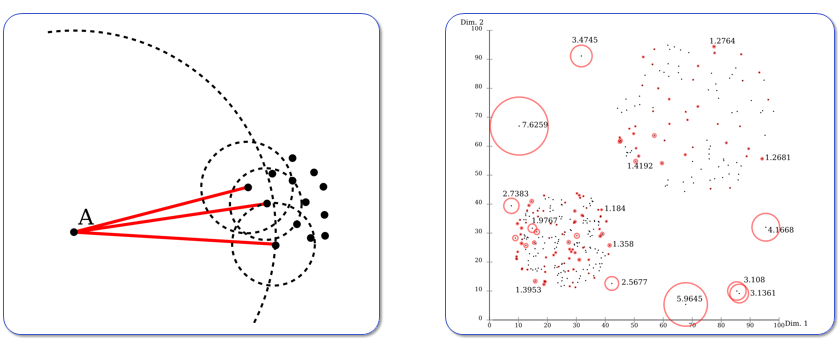

- 기반 수식
$N_k(x)$: x와 k번째 까지의 최근접 점의 집합

$d(x, y)$: x와 y의 거리

$k−distance(𝐱)=m𝑎𝑥𝐨∈𝑁_𝑘(𝐱)𝑑(𝐱,𝐨)$

- 도달거리(Reachable Distance)

$𝑅𝐷_𝑘(𝐱,𝐨)=max\{k−distance(𝐨), 𝑑(𝐱,𝐨)\}$

- LRD(Local Reachable Distance): 지역 밀도

$𝐿𝑅𝐷_𝑘(𝐱)=\frac{|𝑁_𝑘(𝐱)|}{\sum_{𝐨∈𝑁_𝑘(𝐱)}{𝑅𝐷_𝑘(𝐱,𝐨)}}$

- LOF(Local Outlier Factor Score)

$𝐿𝑂𝐹_𝑘(𝐱)=\frac{1}{|𝑁_𝑘(𝐱)|}\sum_{𝐨∈𝑁_𝑘(𝐱)}\frac{𝐿𝑅𝐷_𝑘(𝐨)}{𝐿𝑅𝐷_𝑘(𝐱)}$

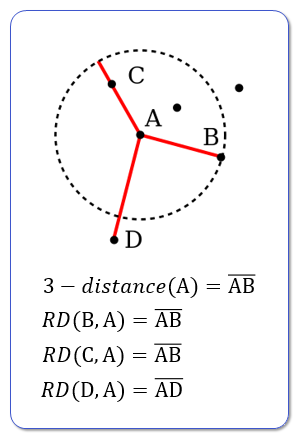

- 출처: Local_outlier_factor - Wikipedia

- LOF(Local Outlier Factor) 점수 분석

|   | 결과 | 분석 |
| --- | --- | --- |
|$𝐿𝑂𝐹_𝑘(𝐱)=1$| 정상 데이터 | 이웃들과 지역 밀도가 비슷 |
|$𝐿𝑂𝐹_𝑘(𝐱)≫1$| 이상치(비정상) | 이웃보다 밀도가 상대적으로 낮음 |
|$𝐿𝑂𝐹_𝑘(𝐱)≪1$| 정상 데이터 | 이웃보다 밀도가 훨씬 높음 |

※ 이상치의 임계값은 데이터의 성격에 따라 설정

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

LOF 모델의 동작을 확인해보기 위해서, 3개의 중심점을 가진 2차원 데이터셋을 만듭니다.

최근접 이웃의 수는 3개로 합니다 $LOF_3$를 구하는 과정을 살펴보고, 결과를 시각화해봅니다.
</div>

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=[25, 25, 10], centers=[[0, 0], [3.5, 3.5], [0, 0]], cluster_std=[1, 1, 4], random_state=123)

In [18]:
from scipy.spatial.distance import pdist, squareform
k = 3
dist = squareform(pdist(X)) # 데이터 포인트 간 거리 행렬을 만듭니다.
k_dist = np.sort(dist, axis=0)[k] # k-distance를 계산합니다.가장 작은 자기자신과의 거리는 제외하여, k + 1 번째의 거리를 취합니다.
n_k = np.sum(dist <= k_dist, axis=0) - 1 # 무조건 포함되는 자기자신은 제외합니다.
rd = np.where(dist > k_dist, dist, k_dist) # Reachable distance를 계산합니다.

In [19]:
idx_sort = np.argsort(dist, axis=1)
# 동점은 존재하지 않는 다고 가정하고 n_k 계산은 하지않고 모두, n_k = 3이라고 전제합니다.
# k개의 이웃 구합니다. 가장 거리가 가까운 자기 자신은 제외합니다. 
# n × 3 개의 행렬로  이웃의 인덱스를 지니고 있습니다. 인접한 순으로 정렬되었습니다.
kneighbors = idx_sort[:, 1:(k + 1)] 
# 이웃과의 거리를 구합니다. n × 3 이웃과의 거리를 지니고 있습니다 인접한 순으로 정렬이 되었습니다.
neighbor_dist = np.vstack([dist[i, kneighbors[i]] for i in range(idx_sort.shape[0])]) 
kdist = neighbor_dist[:, -1] # k-dist는 k번째로 멀리 떨어져 있는 이웃의 거리입니다.
# np.maximum(neighbor_dist, kdist[kneighbors])로 reachable distance를 구합니다.
lrd = 1 / np.mean(np.maximum(neighbor_dist, kdist[kneighbors]), axis=1)
# lof를 계산합니다.
lof = np.mean(lrd[kneighbors] / np.expand_dims(lrd, axis=-1), axis=1)

In [20]:
idx_sort = np.argsort(dist, axis=1)
# 동점은 존재하지 않는 다고 가정하고 n_k 계산은 하지않고 모두, n_k = 3이라고 전제합니다.
# k개의 이웃 구합니다. 가장 거리가 가까운 자기 자신은 제외합니다. 
# n × 3 개의 행렬로  이웃의 인덱스를 지니고 있습니다. 인접한 순으로 정렬되었습니다.
kneighbors = idx_sort[:, 1:(k + 1)] 
# 이웃과의 거리를 구합니다. n × 3 이웃과의 거리를 지니고 있습니다 인접한 순으로 정렬이 되었습니다.
neighbor_dist = np.vstack([dist[i, kneighbors[i]] for i in range(idx_sort.shape[0])]) 
kdist = neighbor_dist[:, -1] # k-dist는 k번째로 멀리 떨어져 있는 이웃의 거리입니다.
# np.maximum(neighbor_dist, kdist[kneighbors])로 reachable distance를 구합니다.
lrd = 1 / np.mean(np.maximum(neighbor_dist, kdist[kneighbors]), axis=1)
# lof를 계산합니다.
lof = np.mean(lrd[kneighbors] / np.expand_dims(lrd, axis=-1), axis=1)

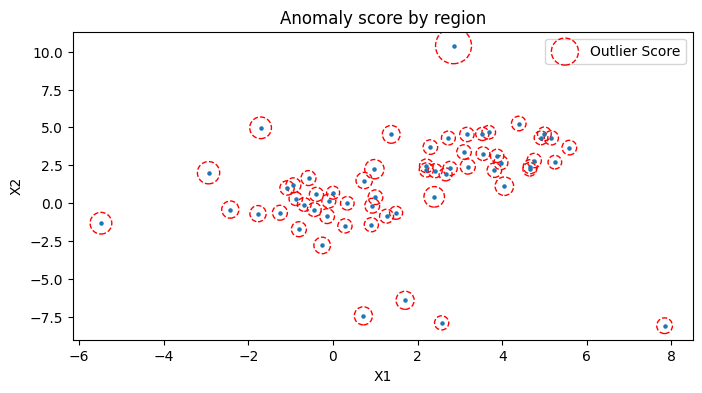

In [21]:
plt.figure(figsize=(8, 4))
# 분류 평면 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
plt.scatter(X[:, 0], X[:, 1], s=100 * lof, color='r', facecolors='none', label='Outlier Score',  linestyle='--')
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Anomaly score by region')
plt.legend()
plt.show()

**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone 데이터에서 성별(Sex)로 구분하여 LOF(Local Outlier Factor) 모델을 사용하여 이상치 탐색을 합니다. 


성별(Sex)를 제외한 나머지 변수들의 입력 변수로 합니다.

결과는 성별(Sex)로 입력변수를 2차원으로 차원 축소하여 시각화해봅니다. 
    
</div>

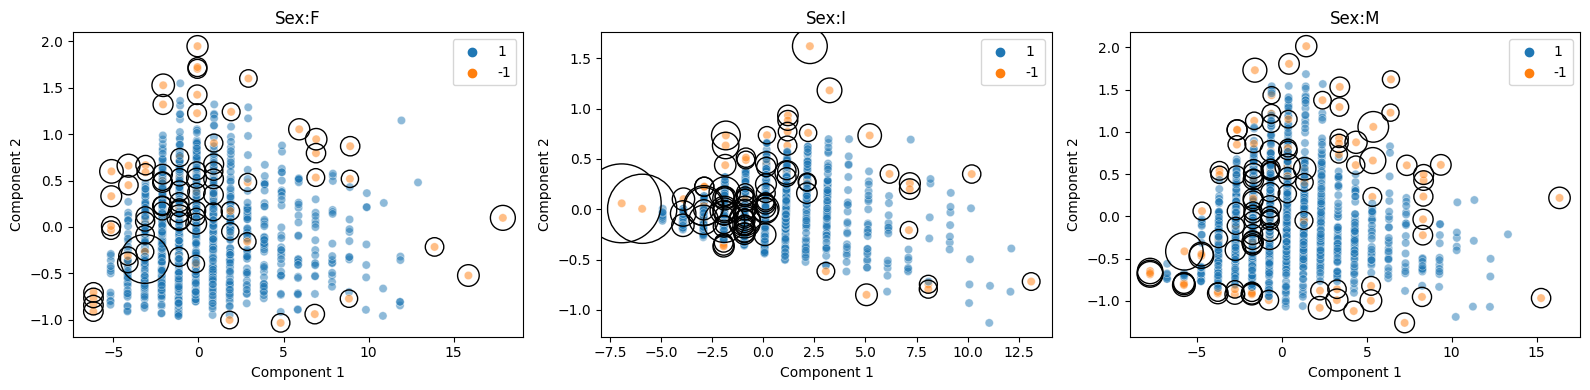

In [22]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

n_neighbors = 5
pca = PCA(n_components=2, random_state=123)
X_cols = [i for i in df_abalone.columns if i != 'Sex']
for ax, (k, df) in zip(axes, df_abalone.groupby('Sex')):
    lof = LocalOutlierFactor(n_neighbors=5, contamination='auto')
    is_outlier = lof.fit_predict(df[X_cols])
    X_pca = pca.fit_transform(df[X_cols])
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=is_outlier.astype(str), ax=ax, alpha=0.5),
    ax.scatter(X_pca[is_outlier == -1, 0], X_pca[is_outlier == -1, 1], 
               s=-lof.negative_outlier_factor_[is_outlier == -1] *  100, facecolors='none', color='k')
    ax.set_title('Sex:{}'.format(k))
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
plt.tight_layout()
plt.show()

#### Isolation Forest
- 이상치는 정상치보다 분리될 수 있다는 성질이용

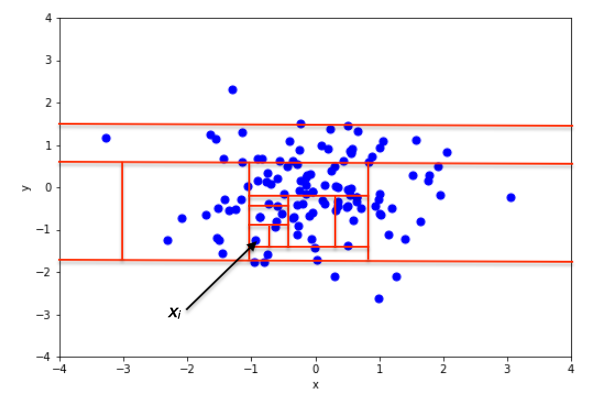
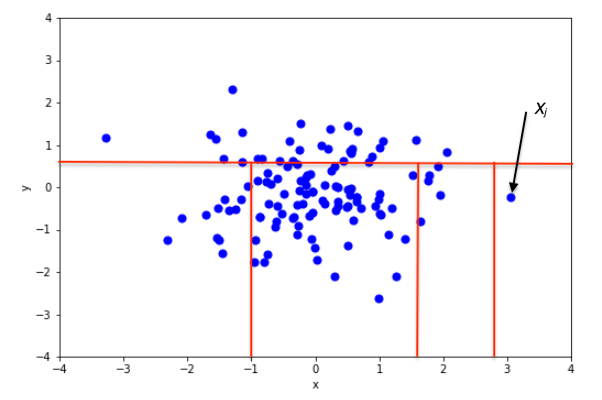

출처: Isolation_forest - Wikipedia

- 학습 알고리즘

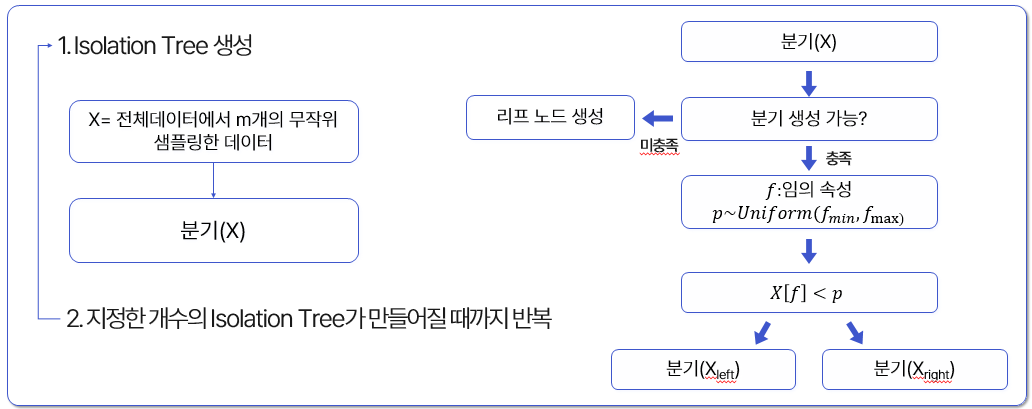

**[Ex.7]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
IsolationForest의 iTree를 만드는 과정을 확인해봅니다
</div>

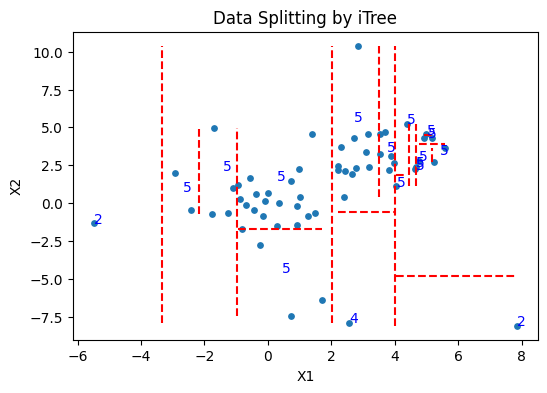

In [23]:
from matplotlib.lines import Line2D
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=[25, 25, 10], centers=[[0, 0], [3.5, 3.5], [0, 0]], cluster_std=[1, 1, 4], random_state=123)

def recursive_split(X, depth=0, max_depth=3, ax=None):
    # 최대 깊이 도달 하거나, 데이터가 하나만 남으면 종료 시킵니다.
    if depth >= max_depth or len(X) <= 1:
        if ax is not None:
            ax.text(
                (X[:, 0].min() + X[:, 0].max()) *0.5,
                (X[:, 1].min() + X[:, 1].max()) *0.5, str(depth), color='blue'
            )
        return
    
    split_targets = list()
    # X1, X2 두 개의 변수만을 고려합니다.
    for i in range(2):
        mn, mx = X[:, i].min(), X[:, i].max()
        # 유일값이 아닐 경우 분기 시킵니다.
        if mn < mx:
            split_targets.append((i, mn, mx))
    # 분기할 변수가 없으면 종료합니다.
    if len(split_targets) == 0:
        ax.text(
            (X[:, 0].min() + X[:, 0].max()) *0.5,
            (X[:, 1].min() + X[:, 1].max()) *0.5, str(depth), color='blue'
        )
        return
    split_target = split_targets[np.random.randint(0, len(split_targets), 1)[0]]
    threshold = np.random.uniform(split_target[1], split_target[2])
    idx = split_target[0]
    # 데이터를 좌우측으로 분할합니다.
    X_left,  X_right =  X[X[:, idx] < threshold], X[X[:, idx] >= threshold]
    if ax != None:
        if idx == 0:
            ax.add_line(Line2D((threshold, threshold), (X[:, 1].min(), X[:, 1].max()), color='r', linestyle='--'))
        else:
            ax.add_line(Line2D((X[:, 0].min(), X[:, 0].max()), (threshold, threshold), color='r', linestyle='--'))
    
    # 왼쪽과 오른쪽 데이터에 대해 재귀적으로 분할합니다.
    recursive_split(X_left, depth + 1, max_depth, ax)
    recursive_split(X_right, depth + 1, max_depth, ax)

plt.figure(figsize=(6, 4))
np.random.seed(123)
# 재귀적으로 데이터 분할 및 시각화
recursive_split(X, max_depth=5, ax = plt.gca())

plt.scatter(X[:, 0], X[:, 1], s=15)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Splitting by iTree')
plt.show()

- 이상치 점수(Anomaly score)

$𝑠(𝐱)=2^{−\frac{h(𝐱)}{𝑐(𝑚)}}$

$h(x) = \frac{1}{t}\sum_{i=1}^t{h_i(x)}$

> $h_i(x)$: i번째 Isolation tree 에서 x 의 분리 깊이

$c(m)$: 기대 경로 길이

$𝑐(𝑚)=2𝐻(𝑚−1)−\frac{2(𝑚−1)}{𝑚}$

> $𝐻(𝑖)=ln(𝑖)+𝛾, 𝛾=0.577215…$

- 이상치 점수 s(x) 분석

|   | 결과 | 분석 |
| --- | --- | --- |
|$𝑠(𝐱)→1$| 이상치 | 격리되기 쉬움 |
|$𝑠(𝐱)≈0.5$| 정상 | 평균적인 경로 |
|$𝑠(𝐱)<0.5$| 정상 | 밀집 영역 |

※ 각 단계 마다 이전 단계의 보완이 필요할 경우 이전 과정 반복

**[Ex.8]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

IsolationForest의 동작을 확인할 수 있는 간단한 데이터를 만들어 이상치의 판별과, 이상치 점수 분포를 시각화하여, 

IsolationForest 모델의 특성을 확인해봅니다.
</div>

In [24]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(
    n_estimators=200, 
    max_samples=0.9, 
    contamination="auto", 
    behaviour='new', random_state=12)
prd = isf.fit_predict(X)
prd

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1])

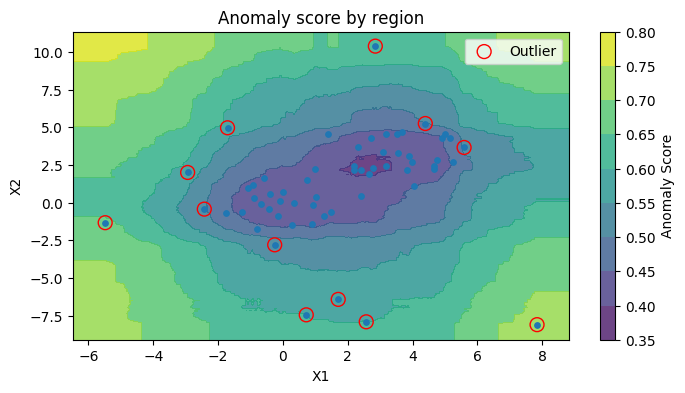

In [25]:
plt.figure(figsize=(8, 4))
# 분류 평면 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
Z = -(isf.decision_function(np.c_[xx.ravel(), yy.ravel()]) + isf.offset_)
Z = Z.reshape(xx.shape)
contour = plt.contourf(xx, yy, Z, alpha=0.8)
cbar = plt.colorbar(contour)
cbar.set_label('Anomaly Score')

X_outlier = X[prd == -1]
plt.scatter(X_outlier[:, 0], X_outlier[:, 1], s=100, color='r', facecolors='none', label='Outlier')
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Anomaly score by region')
plt.legend()
plt.show()

### 6. 이상치 처리

#### 원인과 현상에 따른 적절한 방법으로 정보 왜곡의 최소화가 핵심

| 방법 | 설명 | 사용 상황 |
| --- | --- | --- |
| 제거<br/>(Remove) | 이상치를 데이터셋에서 제거 | 데이터 양이 많고 이상치가 명백한 오류인 경우 |
| 한정<br/>(Clipping) | 상한, 하한 범위 내 값으로 한정 | 이상치의 영향도를 줄이면서,<br/>데이터는 유지하고자 할 때 |
| 대치<br/>(Imputation) | 이상치를 자료의 결손으로 간주하고,<br/>결측치 처리 방법을 적용하여 대치 | 입력 오류로 추정되며 보정이 가능할 때 |
| 변환<br/>(Transformation) | 로그, 제곱근 등 데이터 변환으로 이상치 영향 완화 | 데이터 분포 왜곡을 줄이고자 할 때 |


#### 변환

- 로그 변환
> 우측에 분포한 이상치들을 중앙에 분포하도록 유도

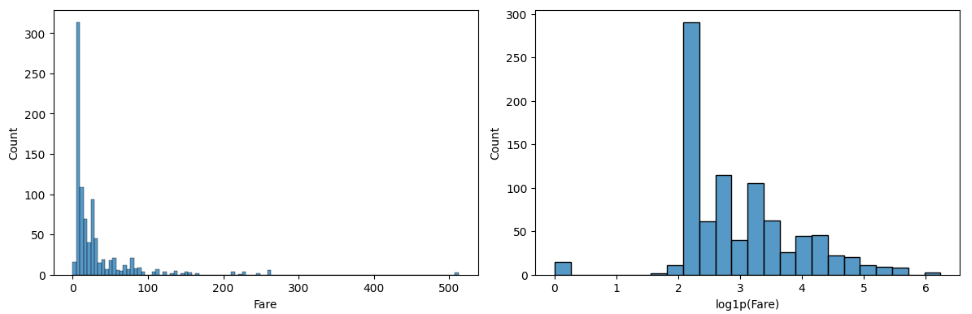


### 7. 데이터 정형화

#### Tidy Data 의 정의, 3 원칙(Hadley Wickham)
- 각 관측치는 하나의 행
- 각 변수는 하나의 열
- 각 단위(관찰 대상)는 하나의 테이블
- Ex) Untidy Data


| 이름 | 키/몸무게 | 값 |
| --- | --- | --- |
| 피카츄 | 키 | 40 |
| 피카츄 | 몸무게 | 6.0 |
| 리자몽 | 키 | 170 |
| 리자몽 | 몸무게 | 90.5 |


#### 상황에 따른 정형화 기법

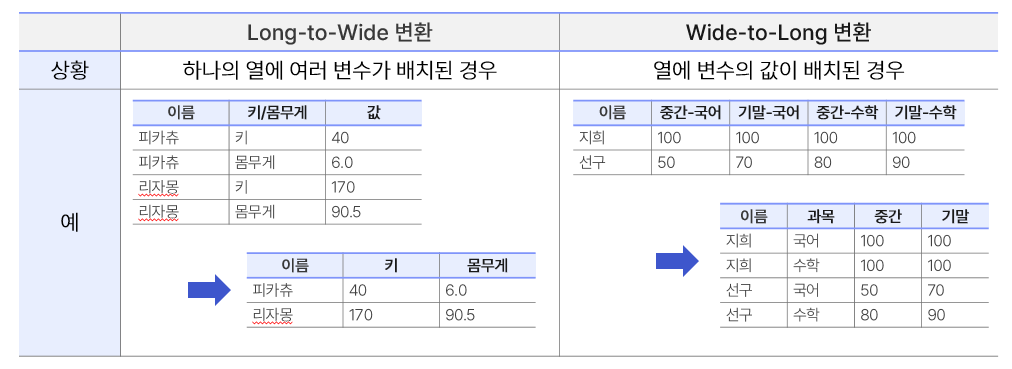

**[Ex.9]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

Long-to-Wide 변환과 Wide-to-Long 변환을 해봅니다.

</div>

In [26]:
# 1. Long-to-Wide 변환 

df_long = pd.DataFrame({
    "student": ["A", "A", "A", "B", "B", "B"],
    "subject": ["math", "english", "science", "math", "english", "science"],
    "score": [90, 85, 88, 75, 80, 82]
})
df_long

,student,subject,score
0,A,math,90
1,A,english,85
2,A,science,88
3,B,math,75
4,B,english,80
5,B,science,82


In [27]:
df_long.pivot(
    index = 'student', columns = 'subject', values = 'score'
)

subject,english,math,science
student,,,
A,85,90,88
B,80,75,82


In [28]:
# 2. Wide-to-Long 변환 
df_wide = pd.DataFrame({
    "student": ["A", "B", "C"],
    "math_2023": [90, 80, 70],
    "math_2024": [92, 82, 72],
    "english_2023": [85, 75, 65],
    "english_2024": [88, 78, 68]
})

In [29]:
# 방법1: pd.wide_to_long
pd.wide_to_long(
    df_wide, ['math', 'english'], i = 'student', j='year', sep='_'
)

,,math,english
student,year,,
A,2023,90,85
B,2023,80,75
C,2023,70,65
A,2024,92,88
B,2024,82,78
C,2024,72,68


In [30]:
# 방법2: melt ~ set_index ~ unstack
df_wide.melt(id_vars=['student']).pipe(
    lambda x: x.join(x['variable'].str.split('_', expand=True).rename(columns={0: 'subject', 1: 'year'}))
).set_index(['student', 'year', 'subject'])['value'].unstack()

subject       english  math
student year               
A       2023       85    90
        2024       88    92
B       2023       75    80
        2024       78    82
C       2023       65    70
        2024       68    72